In [2]:
%matplotlib inline
import srkdata
import srkmisc
import matplotlib.pyplot as plt
import numpy as np
import math
import srkgraphics
import srkanalysis
from scipy.optimize import curve_fit
from matplotlib.legend_handler import HandlerLine2D
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
rcParams['xtick.labelsize'] = 20
graphs_dir='/home/mjbales/work/nedm/graphs/'

import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
# import rootprint
gStyle.SetOptFit()
gStyle.SetOptStat(0)
gROOT.ForceStyle();
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
colors=['blue','red']
linestyles=['-','--']
histogram = TH1D("phi_hist","phi_hist",100,-5,5)

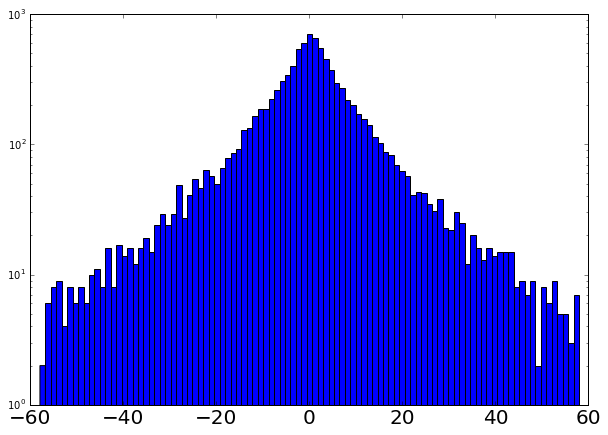

In [3]:
a=0.1
n=10000
s=100
data=np.linspace(0,0,n)

for j in xrange(s):
    for i in xrange(n):
        sigma=1+np.abs(a*data[i])
        data[i] =data[i] + np.random.normal(scale=sigma)
  
stdev = np.std(data)
plt.yscale('log', noncvposy='clip')
plt.hist(data,bins=np.linspace(-3*stdev,3*stdev,100))
plt.show()

YAY!!!
CONVERGED 


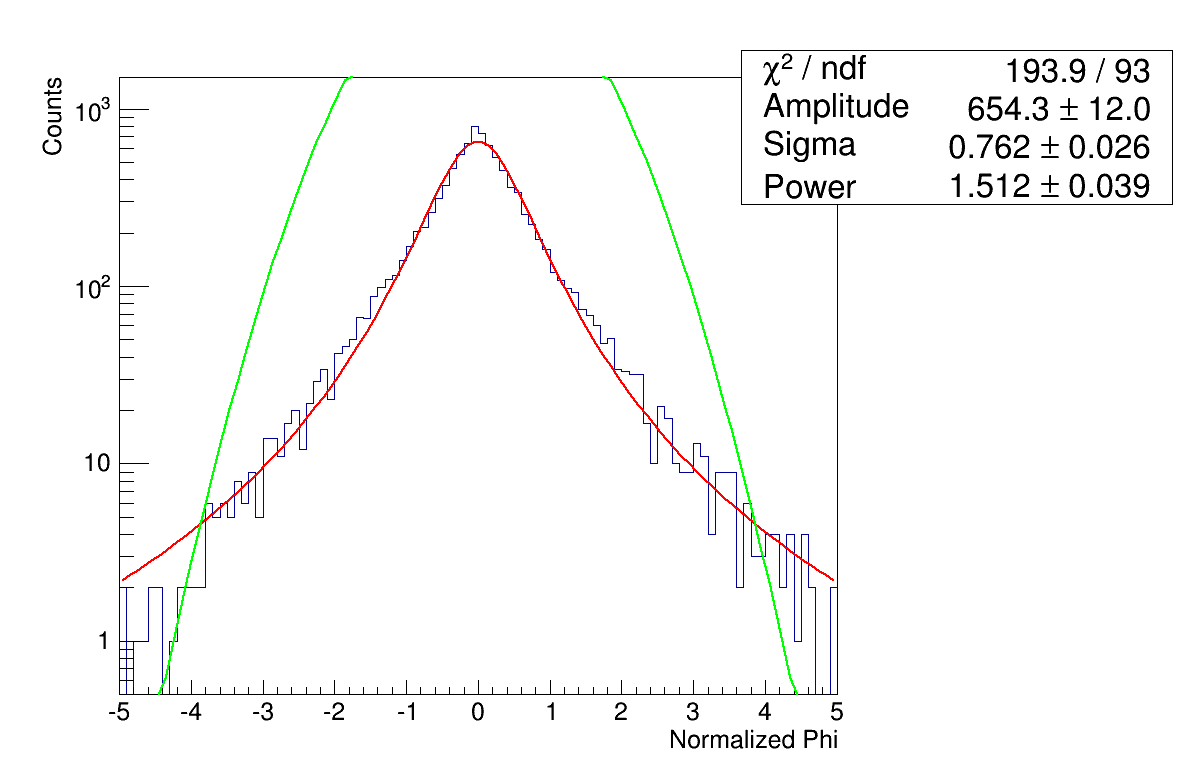

In [16]:
a=0.02
n=10000
s=1000
data=np.linspace(0,0,n)

for j in xrange(s):
    for i in xrange(n):
        sigma=1+np.abs(a*data[i])
        data[i] =data[i] + np.random.normal(scale=sigma)
  
stdev = np.std(data)

c1.Clear()
histogram.IsA().Destructor( histogram )
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
for i in xrange(n):
    histogram.Fill(data[i]/stdev)

gROOT.cd()
c1 = rootnotes.canvas("Canvas", (1200, 800))
histogram.SetTitle(";Normalized Phi;Counts")
histogram.Draw()
phiTsallisFunc = TF1("phiTsallisFunc", "[0]/pow(1+((x)/[1])*((x)/[1]),[2])", -5)
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
phiTsallisFunc.SetParNames("Amplitude", "Sigma", "Power");
phiTsallisFunc.SetParLimits(1,0.1,8)
phiTsallisFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
phiTsallisFunc.SetParLimits(2,0,100)
phiTsallisFunc.SetParameters(max_bin, stdev,2)
histogram.Fit("phiTsallisFunc","M")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
# phiTsallisFunc.Draw("same")
gaus = TF1("gaus","8000*TMath::Gaus(x,0,1)",-5,5)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
c1.SetLogy()
c1
